In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values.reshape(-1, 1)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X.shape, y.shape

((10, 1), (10, 1))

In [4]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict_lin = lin_reg.predict(X)

In [5]:
lin_reg.score(X, y)

0.6690412331929895

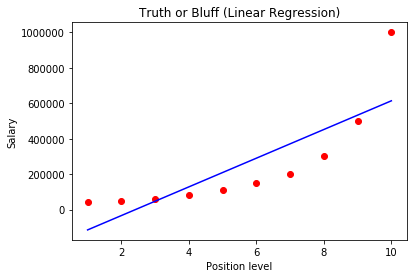

In [6]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, y_predict_lin, color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [7]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

4

In [ ]:
import pandas as pd


In [43]:
pd.DataFrame(X_poly)

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0
5,1.0,6.0,36.0,216.0,1296.0
6,1.0,7.0,49.0,343.0,2401.0
7,1.0,8.0,64.0,512.0,4096.0
8,1.0,9.0,81.0,729.0,6561.0
9,1.0,10.0,100.0,1000.0,10000.0


In [8]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
# Predicting a new result with Polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform(X))

In [9]:
lin_reg_2.score(X_poly, y)

0.9973922891706614

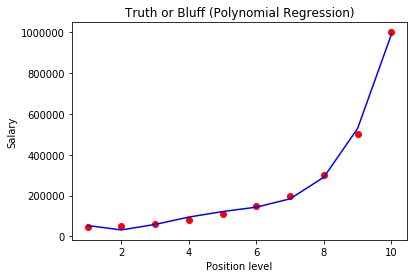

In [10]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred_poly, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

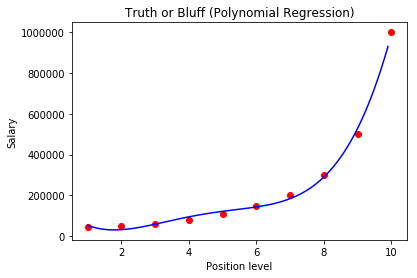

In [11]:
# Visualising the Polynomial Regression results 
#(for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, 
         lin_reg_2.predict(poly_reg.fit_transform(X_grid)),
         color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [12]:
# Predicting a new result with Linear Regression
pred1 = lin_reg.predict(np.array([[6.5]]))
pred2 = lin_reg_2.predict(poly_reg.fit_transform(np.array([[6.5]])))
pred1, pred2

(array([[330378.78787879]]), array([[158862.4526516]]))

In [20]:
mc.r2_score(lin_reg_2.predict())

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [17]:
import sklearn.metrics as mc

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 

C:\Users\Eid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
y_pred_knn = knn.predict(X)
mc.accuracy_score(y, y_pred_knn)

0.1

In [21]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)

In [28]:
lin_reg = LinearRegression()
train_scores_lin, valid_scores_lin = validation_curve(LinearRegression(), X, y)

TypeError: validation_curve() missing 2 required positional arguments: 'param_name' and 'param_range'

In [27]:
lin_reg = LinearRegression()
train_scores_lin, valid_scores_lin = validation_curve(LinearRegression(), X, y, cv=5,
                                                     param_name="n_estimators",
                                                     param_range=param_range,
                                                     scoring="accuracy", 
                                                     n_jobs=-1)

TypeError: validation_curve() missing 2 required positional arguments: 'param_name' and 'param_range'

In [23]:
poly_reg = LinearRegression()
train_scores_poly, valid_scores_poly = validation_curve(poly_reg(), X_poly, y, cv=5)

TypeError: 'LinearRegression' object is not callable

In [ ]:
from sklearn.model_selection import learning_curve

In [90]:
df = pd.read_csv('data/water_level.csv',delimiter=';')
df.head()

,X,y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


In [94]:
X = df['X'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)
X.shape, y.shape

((54, 1), (54, 1))

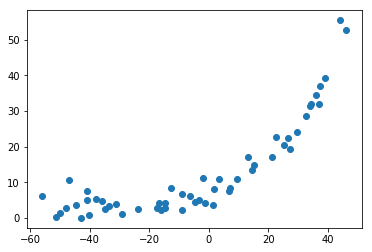

In [95]:
plt.scatter(X, y)

In [128]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mc
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [135]:
train_err = []
test_err = []

for n in range(1, 20):
    poly_train = PolynomialFeatures(degree = n)
    X_poly_train = poly_train.fit_transform(X_train)
    poly_train.fit(X_poly_train, y_train)

    poly_test = PolynomialFeatures(degree = n)
    X_poly_test = poly_test.fit_transform(X_test)
    poly_test.fit(X_poly_test, y_test)
    # Predicting a new result with Polynomial Regression
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    y_pred_train = poly_reg.predict(X_poly_train)
    y_pred_test = poly_reg.predict(X_poly_test)
    train_err.append(mc.mean_squared_error(y_pred_train, y_train)**(0.5))
    test_err.append(mc.mean_squared_error(y_pred_test, y_test)**(0.5))

KeyboardInterrupt: 

In [136]:
train_err

[7.803563242410936,
 3.5596149640305295,
 2.7232925489001163,
 2.4839665995553966,
 2.4653237428223536,
 2.464112982089604,
 2.4424312324121296,
 2.4338734637573505,
 2.264565764952452,
 2.3696642989950734,
 2.3910842236089596,
 2.7151864539667225,
 2.9529971723302313]

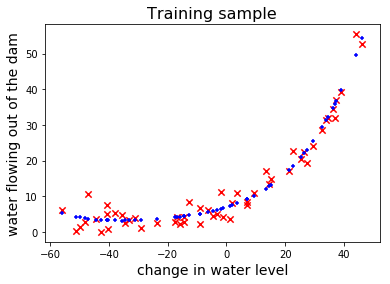

In [125]:
fig, ax = plt.subplots()
ax.scatter(X, y, marker="x", s=40, c='red')
ax.scatter(X, y_pred_poly, marker="+", s=20, c='blue')
plt.xlabel("change in water level", fontsize=14)
plt.ylabel("water flowing out of the dam", fontsize=14)
plt.title("Training sample", fontsize=16)
plt.show()

ValueError: Unrecognized marker style -

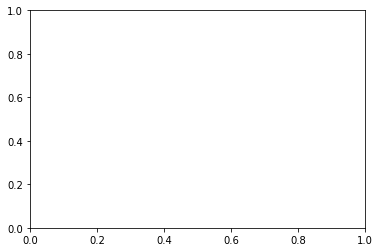

In [137]:
fig, ax = plt.subplots()
ax.plot(train_err, marker="-", c='red')
ax.plot(test_err, marker="--", c='blue')
plt.xlabel("change in water level", fontsize=14)
plt.ylabel("water flowing out of the dam", fontsize=14)
plt.title("Training sample", fontsize=16)
plt.show()

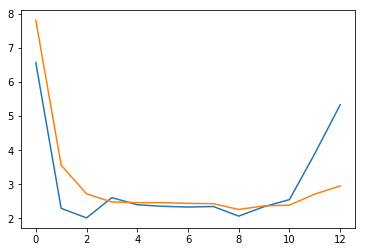

In [141]:

plt.plot(test_err)
plt.plot(train_err)